<a href="https://colab.research.google.com/github/graceetzel/Numerical-Analysis/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

/tmp/ipython-input-1746835218.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


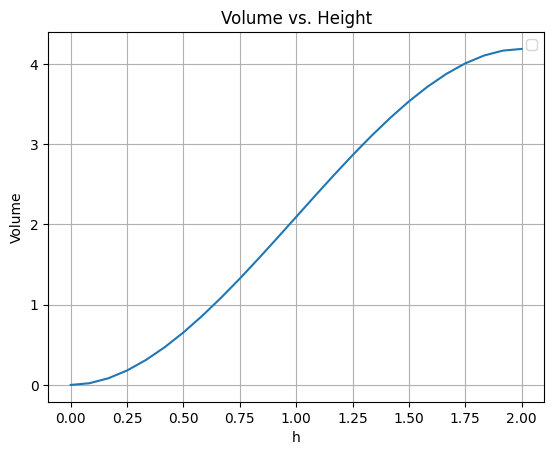

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

#Suppose we let R=1 (as denoted in the problem)

#Define function
def vol(h):
  return (pi*h**2/3)*(3*R-h)
R=1
h=np.linspace(0,2*R,25)

#Plot + plot features
plt.plot(h,vol(h))
plt.xlabel('h')
plt.ylabel('Volume')
plt.title('Volume vs. Height')
plt.legend()
plt.grid(True)
plt.show()

In the next code, we ask the question: What happens when we decide to not fix $R=1$. This is not necessarily part of question one, but it is interesting to consider the graph anyway.

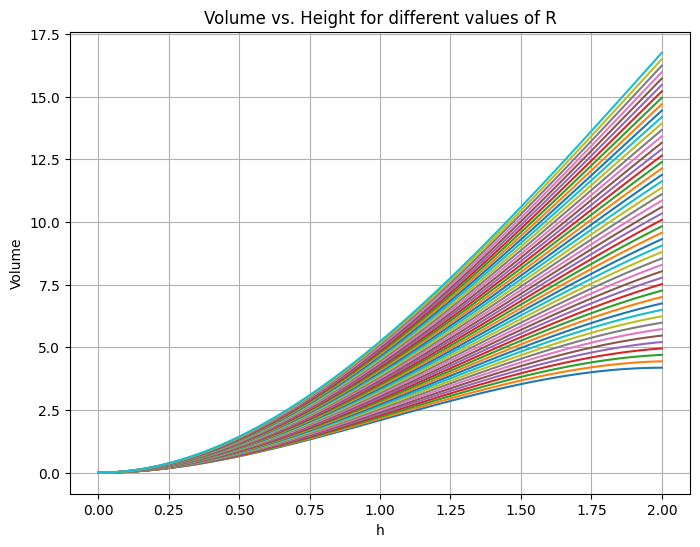

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def vol(h, R):
    return (pi * h**2 / 3) * (3 * R - h)

# Range of h values
h = np.linspace(0, 2, 100)

# Different values of R to plot
R_values = np.linspace(1,2)

# Plot for each R
plt.figure(figsize=(8, 6))
for R in R_values:
    plt.plot(h, vol(h, R), label=f'R = {R}')

# plot features :)
plt.xlabel('h')
plt.ylabel('Volume')
plt.title('Volume vs. Height for different values of R')
plt.grid(True)
plt.show()

Next, we plan to consider want to estimate the height when we are given $V(h)=1$ and $R=1$.

Bisection Method:

In [ ]:
#Defining the bisection method

def bisection(f , a , b , tol =1e-6):
  if np . sign ( f ( a )) * np . sign ( f ( b )) >= 0:
    raise ValueError ( " No sign change " )
  while ( b - a ) / 2 > tol :
    c = ( a + b ) / 2
    if f ( c ) == 0:
      return c
    if np . sign ( f ( c )) * np . sign ( f ( a )) < 0:
      b = c
    else :
      a = c
  return ( a + b ) / 2

#Defining the function with given values of a and b, where we set V(h)-1=0
f = lambda h : (pi * h**2 / 3) * (3 - h)-1
a = 0
b = 1

#Finding the root
root = bisection(f , a , b)
print ( root )


0.6355009078979492


Fixed Point Method:

We need to consider rearranging the function. Suppose we solve
$\dfrac{\pi h^2}{3}(3-h)=1$. This will give us
$h=\sqrt{\dfrac{3}{\pi (3-h)}}$. We name this as our fix point function, where $h=g(h)$.

In [ ]:
from math import pi, sqrt

#Definition of fixed-point code from class
def fixed_point(g, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("No convergence")

# Rearranged function
g = lambda h: sqrt(3 / (pi * (3 - h)))

# Initial guess must be less than 3
try:
    h_root = fixed_point(g, 0.5)
    print(h_root)
except ValueError as e:
    print(e)

0.6355007040718964


Newton's Method:

In [ ]:
#Definition of Newton Method given in class
def newton(f , df , x0 , tol =1e-6 , max_iter =50):
  x = x0
  for _ in range ( max_iter ):
    fx = f ( x )
    dfx = df ( x )
    if dfx == 0:
      raise ValueError ( " Derivative is zero " )
    x_new = x - fx / dfx
    if abs( x_new - x ) < tol :
      return x_new
    x = x_new
  raise ValueError ( " No convergence " )

#Defining the function, derivative, and the inital value
f = lambda h : (pi * h**2 / 3) * (3 - h)-1
df = lambda h : (pi * h)*(2-h)
x0=0.5
newton(f , df , x0 , tol =1e-6 , max_iter =50)

0.6355008062620668

Secant Method:

In [ ]:
#Definition of secant method that we used in class
def secant(f , x0 , x1 , tol =1e-6 , max_iter =50):
  for _ in range ( max_iter ):
    fx0 , fx1 = f ( x0 ) , f ( x1 )
    if fx1 - fx0 == 0:
      raise ValueError ( " Division by zero " )
    x_new = x1 - fx1 * ( x1 - x0 ) / ( fx1 - fx0 )
    if abs( x_new - x1 ) < tol :
      return x_new
    x0 , x1 = x1 , x_new
  raise ValueError ( " No convergence " )

#Defining function and two points
f = lambda h : (pi * h**2 / 3) * (3 - h)-1
x0 = 0.5
x1 = 1
secant(f , x0 , x1 , tol =1e-6 , max_iter =50)


0.6355008062620415

Numerical Solver

In [ ]:
from scipy.optimize import brentq
import numpy as np

#Defining variables
f = lambda h : (pi * h**2 / 3) * (3 - h)-1
a=0.1
b=2
print(brentq(f,a,b))

0.6355008062620426


**Part (c)**

Estimate convergence rate

In [ ]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Found this code online
true_root = brentq(f,0,1)

def convergence_rate(errors):
    log_e1 = []
    log_e2 = []
    for i in range(len(errors) - 1):
        e1 = errors[i]
        e2 = errors[i + 1]
        if e1 > 0 and e2 > 0:
            log_e1.append(math.log(e1))
            log_e2.append(math.log(e2))

    if len(log_e1) < 2:
        print("Not enough data")
        return None

    model = sm.OLS(log_e2, sm.add_constant(log_e1))
    results = model.fit()
    intercept, slope = results.params
    M = math.exp(intercept)

    print(f"Estimated order r: {slope:.4f}")
    print(f"Estimated constant M: {M:.4f}")
    print(log_e2)

    # Optional: plot regression
    plt.plot(log_e1, log_e2, 'o', label='Data')
    fitted = [slope * x + intercept for x in log_e1]
    plt.plot(log_e1, fitted, 'r-', label='Fitted line')
    plt.xlabel("log(e_n)")
    plt.ylabel("log(e_{n+1})")
    plt.title("Convergence (log-log)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope, M



redefining bisection method with incorporating interations

In [ ]:
def bisection(f, a, b, tol=1e-6, max_iter=100):
    if np.sign(f(a)) * np.sign(f(b)) >= 0:
        raise ValueError("No sign change in interval [a, b]")

    iterates = []
    errors = []
    true_root = brentq(f, a, b)

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        iterates.append(c)
        errors.append(abs(c - true_root))

        if f(c) == 0:
            break
        elif np.sign(f(c)) * np.sign(f(a)) < 0:
            b = c
        else:
            a = c

    return iterates, errors
b_iter, b_errors = bisection(f, 0.1, 2)
print(b_errors)

[0.4144991937379574, 0.06050080626204257, 0.17699919373795736, 0.05824919373795745, 0.0011258062620425058, 0.028561693737957472, 0.013717943737957539, 0.006296068737957516, 0.00258513123795745, 0.000729662487957472, 0.00019807188704246137, 0.0002657953004574498, 3.386170670749422e-05, 8.210509016748357e-05, 2.4121691730050188e-05, 4.870007488722017e-06, 9.625842120719597e-06, 2.3779173159432787e-06, 1.2460450864448802e-06, 5.659361147491992e-07]


redefining fixed point method with incorporating interations

In [ ]:
def fixed_point(g,f, x0, a=0,b=1, tol=1e-6, max_iter=100):
    x = x0
    #incorporates iterations
    iterates = []
    errors = []
    true_root = brentq(f, a,b)

    for _ in range(max_iter):
        x_new = g(x)
        #appends new values
        iterates.append(x_new)
        errors.append(abs(x_new - true_root))
        #measures until the previous term hits tolerance
        if abs(x_new - x) < tol:
            return iterates, errors
        x = x_new
    raise ValueError("No convergence")

fp_iter, fp_errors = fixed_point(g,f, 0.5)
print(fp_errors)

[0.017462083024963437, 0.002333703131447762, 0.00031337995632230164, 4.210900588963451e-05, 5.658692936449938e-06, 7.604353341461589e-07, 1.021901704367778e-07]


redefining newton's method by incorporating iterations

In [ ]:
def newton(f, df , x0 , a=0,b=2, tol =1e-6 , max_iter =100):
  x = x0
  #incorporate iterations
  iterates = []
  errors = []
  true_root = brentq(f, a, b)
  for _ in range ( max_iter ):
    fx = f ( x )
    dfx = df ( x )
    if dfx == 0:
      raise ValueError ( " Derivative is zero " )
    x_new = x - fx / dfx
    #append new values
    iterates.append(x_new)
    errors.append(abs(x_new - true_root))
    #measures until absolute value of previous term hits tolerance
    if abs( x_new - x ) < tol :
      return iterates, errors
    x = x_new
  raise ValueError ( " No convergence " )
nr_iter, nr_errors = newton(f, df, 0.5)
print(nr_iter)

[0.6466354038006098, 0.6355513928719423, 0.6355008073375898, 0.6355008062620668]


redefining secant method by incorporating iterations

In [ ]:
def secant(f , x0 , x1 , tol =1e-6 , max_iter =100):
  #incorporates iterations
  iterates = []
  errors = []
  true_root = brentq(f, x0, x1)
  for _ in range ( max_iter ):
    fx0 , fx1 = f ( x0 ) , f ( x1 )
    if fx1 - fx0 == 0:
      raise ValueError ( " Division by zero " )
    x_new = x1 - fx1 * ( x1 - x0 ) / ( fx1 - fx0 )
    #appends new values
    iterates.append(x_new)
    errors.append(abs(x_new - true_root))
    #measures until absolute value of previous term hits tolerance
    if abs( x_new - x1 ) < tol :
      return iterates, errors
    x0 , x1 = x1 , x_new
  raise ValueError ( " No convergence " )
sc_iter, sc_errors = secant(f, 0.5, 1)
print(sc_iter)

[0.619974421291408, 0.6340252639828656, 0.635510657468166, 0.6355008001400012, 0.6355008062620415]



 Bisection Method:
Estimated order r: 0.9280
Estimated constant M: 0.2905
[-2.8050985873888084, -1.731610101571466, -2.843025028040576, -6.789255822645229, -3.555688838718867, -4.289050541243237, -5.067829850207841, -5.957979003274684, -7.222928476000101, -8.526880527291187, -8.232784092588426, -10.29322577770103, -9.407510543823847, -10.632399050503066, -12.232415083145698, -11.551059188555945, -12.949285530719331, -13.595535953305935, -14.384784636581537]


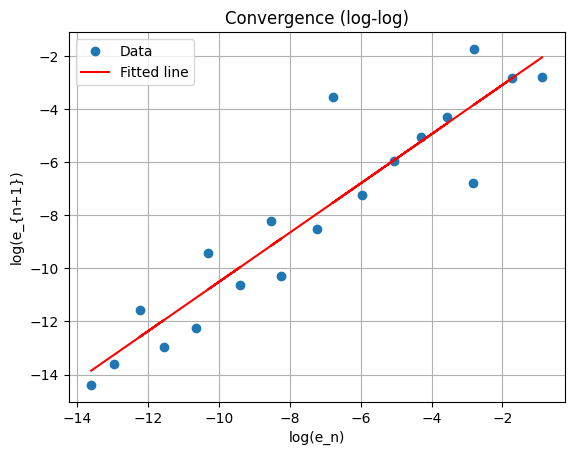


 Fixed-Point Iteration:
Estimated order r: 0.9996
Estimated constant M: 0.1337
[-6.060298946246156, -8.068094185664172, -10.075248923534438, -12.082317622373452, -14.089374759570914, -16.096430343481646]


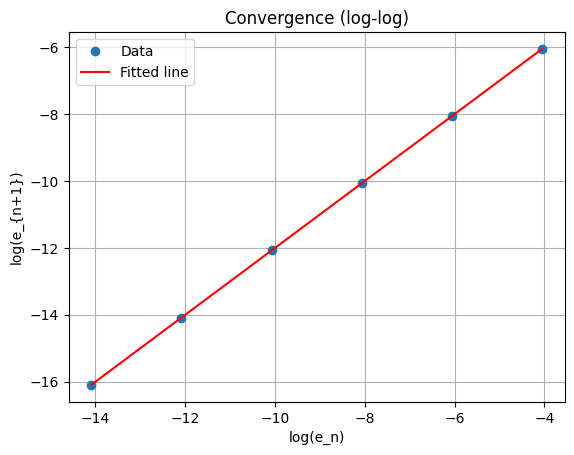


 Newton-Raphson:
Estimated order r: 1.6382
Estimated constant M: 0.0372
[-9.891823643656004, -20.65045867511067, -36.7368005696771]


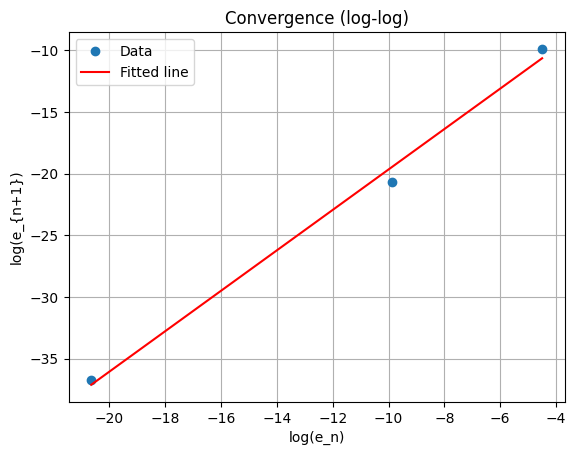


 Secant Method:
Estimated order r: 1.6501
Estimated constant M: 0.9034
[-6.518729709839844, -11.527916663657122, -18.91136627576534, -31.30745494072266]


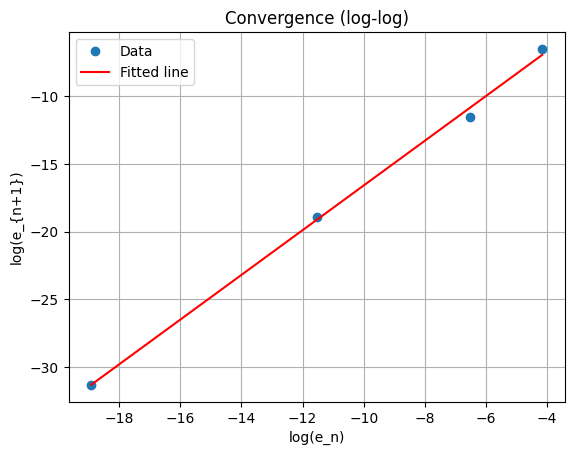

(np.float64(1.650140833075237), 0.9034018183007727)

In [ ]:
b_iter, b_errors = bisection(f, 0.1, 2)
fp_iter = fixed_point(g,f, 0.5)
nr_iter = newton(f, df, 0.5)
sc_iter = secant(f, 0.5, 1)

# Estimate convergence rates
print("\n Bisection Method:")
convergence_rate(b_errors)

print("\n Fixed-Point Iteration:")
convergence_rate(fp_errors)

print("\n Newton-Raphson:")
convergence_rate(nr_errors)

print("\n Secant Method:")
convergence_rate(sc_errors)

# Problem 2

Bisection Method:
$$
f(x)= x^4-2
$$

Estimated order r: 0.9195
Estimated constant M: 0.2291
[-2.745641248839396, -6.37295046619181, -3.5219123425556265, -4.274580575470413, -5.098584110790183, -6.119691178988796, -8.310138383505027, -7.221709457050597, -8.325452580518274, -13.189907862194104, -9.02634571377021, -9.735167156657768, -10.46041974000177, -11.22104595546442, -12.064569220329814, -13.15008150751179, -17.08630218506835]


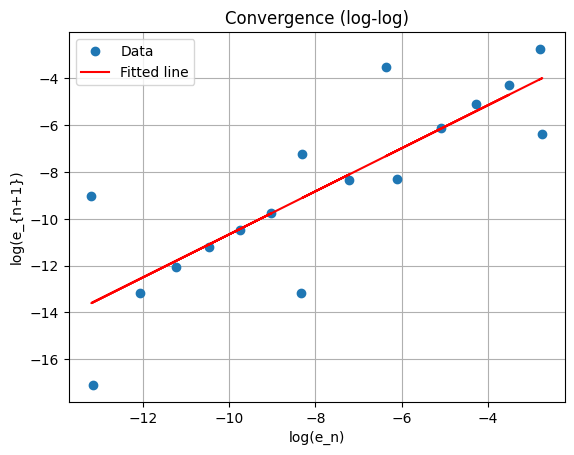

(np.float64(0.9194512950240976), 0.22910967032918894)

In [ ]:
#Convergence rate for Bisection method
f_1 = lambda x: x**4-2
b_method, b_errors = bisection(f_1,1,1.5)
convergence_rate(b_errors)

Secant Method
$$
f(x)=x^4-2
$$

Estimated order r: 1.5337
Estimated constant M: 0.8560
[-1.3789703889181313, -0.9143482633471821, -2.214412073947074, -3.114973910633326, -4.985405187259816, -7.842012200938797, -12.599754313385729, -20.209275943787876, -30.614307760162717]


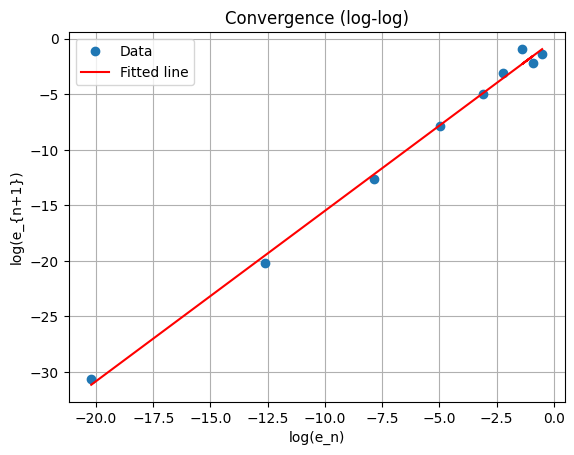

(np.float64(1.5336642360293502), 0.8559690246790623)

In [ ]:
#Convergence rate for Secant method
f_1 = lambda x: x**4-2
sc_method, sc_errors = secant(f_1,0,1.5)
convergence_rate(sc_errors)

Newton's Method

$$
f(x)=x^4-2
$$

Estimated order r: 1.9906
Estimated constant M: 1.1787
[-8.723248199616664, -17.214546166246766, -34.097743240061845]


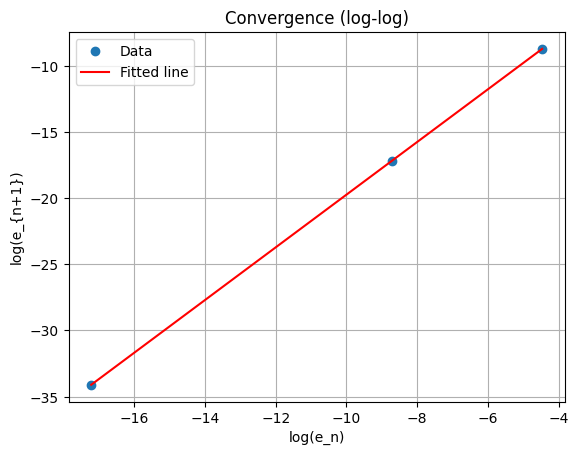

(np.float64(1.9905867803379724), 1.1787248117054967)

In [ ]:
#Convergence for Newton's method
f_1 = lambda x: x**4-2
df = lambda x: 4*x**3
x0=1.1
nr_method, nr_errors = newton(f_1,df,x0,a=1,b=2)
convergence_rate(nr_errors)

Fixed-Point Method
$$
g(x)=\frac{x}{2}+\frac{1}{x^3}
$$

In [ ]:
g_1 = lambda x:(0.5 * x) + (1 / (x**3))
x0=1.189207
fp_iter,fp_errors = fixed_point(g_1,f_1, x0,a=1, b=2)
convergence_rate(fp_errors)
print(2**(1/4))

Not enough data
1.189207115002721


Fixed Point Method:
\begin{align}
g(x)=\frac{2x}{3}+\frac{2}{3x^3}
\end{align}

Estimated order r: 1.0000
Estimated constant M: 0.3333
[-14.050505590239954, -15.149113890074519, -16.247727510037226]


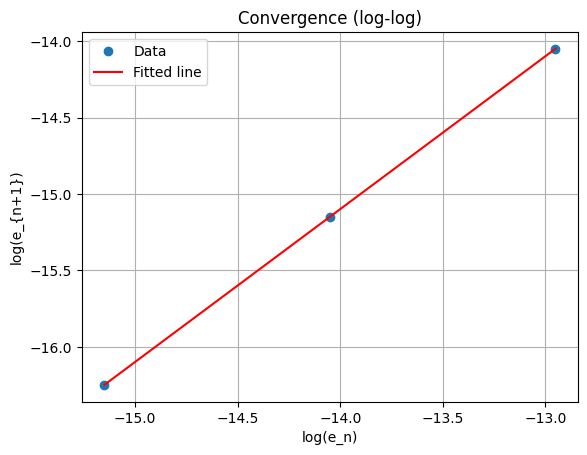

(np.float64(0.9999951596823932), 0.3333096302140053)

In [ ]:
g_1 = lambda x:((2 * x)/3) + (2 / (3*x**3))
x0=1.1892
fp_iter,fp_errors = fixed_point(g_1,f_1, x0,a=1, b=2)
convergence_rate(fp_errors)

# Problem 3

**Part a**

Newton's Method

In [ ]:
def newton(f, df , x0 , a=0,b=2, tol =1e-12 , max_iter =50):
  x = x0
  #incorporate iterations
  iterates = []
  errors = []
  true_root = brentq(f, a, b)
  for _ in range ( max_iter ):
    fx = f ( x )
    dfx = df ( x )
    if dfx == 0:
      raise ValueError ( " Derivative is zero " )
    x_new = x - fx / dfx
    #append new values
    iterates.append(x_new)
    errors.append(abs(x_new - true_root))
    #measures until absolute value of previous term hits tolerance
    if abs( x_new - x ) < tol :
      return iterates, errors
    x = x_new
  raise ValueError ( " No convergence " )

In [ ]:
f_2 = lambda x: np.sin(x)+(x**3)*np.cos(x)-x**2-x
df = lambda x: np.cos(x)+(x**3)*np.sin(x)-2*x-1
x0=1
df_2 = lambda x: np.cos(x) + 3 * x**2 * np.cos(x) - x**3 * np.sin(x) - 2 * x - 1
nr_iter,nr_errors=newton(f_2,df_2,x0)
print(nr_iter)

[np.float64(0.63206523914902), np.float64(0.2614377317011104), np.float64(0.11268503874977998), np.float64(0.05333862817221481), np.float64(0.026037585709345765), np.float64(0.012872978877426128), np.float64(0.006401411546914628), np.float64(0.0031921004397071125), np.float64(0.0015939189405656904), np.float64(0.0007964291290166474), np.float64(0.0003980822872705212), np.float64(0.00019900811272757638), np.float64(9.949580343030465e-05), np.float64(4.9745839080535426e-05), np.float64(2.487240395641835e-05), np.float64(1.243607309155858e-05), np.float64(6.2180043252406886e-06), np.float64(3.1089941076902913e-06), np.float64(1.5544950401181076e-06), np.float64(7.77247016694477e-07), np.float64(3.886233825271903e-07), np.float64(1.943116598056664e-07), np.float64(9.715582204111174e-08), np.float64(4.8577909025724054e-08), np.float64(2.4288954039305735e-08), np.float64(1.2144476855153645e-08), np.float64(6.072238440934307e-09), np.float64(3.036119227524378e-09), np.float64(1.51805960064136

Modified Newton's Method

In [ ]:
def mod_newton(f, df , x0 ,m, a=0,b=2, tol =1e-12 , max_iter =50):
  x = x0
  #incorporate iterations
  iterates = []
  errors = []
  true_root = brentq(f, a, b)
  for _ in range ( max_iter ):
    fx = f ( x )
    dfx = df ( x )
    if dfx == 0:
      raise ValueError ( " Derivative is zero " )
    x_new = x - (m*fx) / dfx
    #append new values
    iterates.append(x_new)
    errors.append(abs(x_new - true_root))
    #measures until absolute value of previous term hits tolerance
    if abs( x_new - x ) < tol :
      return iterates, errors
    x = x_new
  raise ValueError ( " No convergence " )

In [ ]:
mnr_iter,mnr_errors=mod_newton(f_2,df_2,x0,m=3)
print(mnr_iter)

[np.float64(-0.10380428255293994), np.float64(0.04604744887934059), np.float64(-0.024424438033589083), np.float64(0.011850794940438482), np.float64(-0.006014470794079917), np.float64(0.0029847968715999863), np.float64(-0.0014979873326944285), np.float64(0.0007475938143319811), np.float64(-0.00037414654387265124), np.float64(0.00018698582183413154), np.float64(-9.351476833548497e-05), np.float64(4.6751919174208007e-05), np.float64(-2.337732575550748e-05), np.float64(1.1688321325548364e-05), np.float64(-5.844246049609151e-06), np.float64(2.9221016777410712e-06), np.float64(-1.4610561754169319e-06), np.float64(7.305267536833896e-07), np.float64(-3.6526371053009904e-07), np.float64(1.8263177222048544e-07), np.float64(-9.131590692868848e-08), np.float64(4.565794822613095e-08), np.float64(-2.2828975605988216e-08), np.float64(1.1414487477650963e-08), np.float64(-5.707243599381621e-09), np.float64(2.853621888265297e-09), np.float64(-1.4268110151289484e-09), np.float64(7.134055707042651e-10), n

**part b**

Table for Newton's method:

In [ ]:
#Creating the variables for the table
import pandas as pd
import numpy as np

ratio_errors = [nr_errors[i]/nr_errors[i-1] for i in range(len(nr_errors))]
i = np.linspace(1, len(nr_errors), len(nr_errors))

#Creating the table for modified newton method
data = {
     "Iteration": i,
     "Newton's Method Estimate":nr_iter,
     "Errors":nr_errors,
     "Ratio of Errors":ratio_errors
 }
df = pd.DataFrame(data)
print(df)
print(len(mnr_errors))
print(len(ratio_errors))

    Iteration  Newton's Method Estimate        Errors  Ratio of Errors
0         1.0              6.320652e-01  6.320652e-01     8.527217e+11
1         2.0              2.614377e-01  2.614377e-01     4.136246e-01
2         3.0              1.126850e-01  1.126850e-01     4.310206e-01
3         4.0              5.333863e-02  5.333863e-02     4.733426e-01
4         5.0              2.603759e-02  2.603759e-02     4.881563e-01
5         6.0              1.287298e-02  1.287298e-02     4.943999e-01
6         7.0              6.401412e-03  6.401412e-03     4.972751e-01
7         8.0              3.192100e-03  3.192100e-03     4.986557e-01
8         9.0              1.593919e-03  1.593919e-03     4.993323e-01
9        10.0              7.964291e-04  7.964291e-04     4.996673e-01
10       11.0              3.980823e-04  3.980823e-04     4.998339e-01
11       12.0              1.990081e-04  1.990081e-04     4.999170e-01
12       13.0              9.949580e-05  9.949580e-05     4.999585e-01
13    

Table for Modified Newton's method:

In [ ]:
#Creating the variables for the table
import pandas as pd
import numpy as np

ratio_errors = [mnr_errors[i]/mnr_errors[i-1] for i in range(len(mnr_errors))]
i = np.linspace(1, len(mnr_errors), len(mnr_errors))

#Creating the table for modified newton method
data = {
     "Iteration": i,
     "Newton's Method Estimate":mnr_iter,
     "Errors":mnr_errors,
     "Ratio of Errors":ratio_errors
 }
df = pd.DataFrame(data)
print(df)
print(len(mnr_errors))
print(len(ratio_errors))
#

    Iteration  Newton's Method Estimate        Errors  Ratio of Errors
0         1.0             -1.038043e-01  1.038043e-01     5.958206e+11
1         2.0              4.604745e-02  4.604745e-02     4.435987e-01
2         3.0             -2.442444e-02  2.442444e-02     5.304189e-01
3         4.0              1.185079e-02  1.185079e-02     4.852024e-01
4         5.0             -6.014471e-03  6.014471e-03     5.075162e-01
5         6.0              2.984797e-03  2.984797e-03     4.962692e-01
6         7.0             -1.497987e-03  1.497987e-03     5.018725e-01
7         8.0              7.475938e-04  7.475938e-04     4.990655e-01
8         9.0             -3.741465e-04  3.741465e-04     5.004677e-01
9        10.0              1.869858e-04  1.869858e-04     4.997663e-01
10       11.0             -9.351477e-05  9.351477e-05     5.001169e-01
11       12.0              4.675192e-05  4.675192e-05     4.999416e-01
12       13.0             -2.337733e-05  2.337733e-05     5.000292e-01
13    